In [1]:
import sys
sys.path.append('../')
from generator_class import DataGenerator
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf

2025-02-21 11:16:42.297906: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-21 11:16:42.304920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-21 11:16:42.312852: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-21 11:16:42.315307: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-21 11:16:42.321325: I tensorflow/core/platform/cpu_feature_guar

In [3]:
n_channels = 3
dimensions = (300, 300)
params = {'batch_size': 100,'dim':dimensions, 'n_channels':n_channels}

In [4]:
path_to_df = 'test.pkl'
df = pd.read_pickle(path_to_df)
generator = DataGenerator(df, **params)

In [19]:
df['image_path']

0       /home/dirac/HEP/data/atmo_maps_v2/test/event_r...
1       /home/dirac/HEP/data/atmo_maps_v2/test/event_r...
2       /home/dirac/HEP/data/atmo_maps_v2/test/event_r...
3       /home/dirac/HEP/data/atmo_maps_v2/test/event_r...
4       /home/dirac/HEP/data/atmo_maps_v2/test/event_r...
                              ...                        
8300    /home/dirac/HEP/data/atmo_maps_v2/test/event_r...
8301    /home/dirac/HEP/data/atmo_maps_v2/test/event_r...
8302    /home/dirac/HEP/data/atmo_maps_v2/test/event_r...
8303    /home/dirac/HEP/data/atmo_maps_v2/test/event_r...
8304    /home/dirac/HEP/data/atmo_maps_v2/test/event_r...
Name: image_path, Length: 8305, dtype: object

In [5]:
maps, label = generator.get_data_and_labels([0,1,2,3])

In [6]:
maps[0].shape

(3, 300, 300)

In [7]:
def plot_image(pixel_maps):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle('Pixel Maps')        
    titles = ['U', 'V', 'Z']
    data_masked = np.ma.masked_where(pixel_maps == 0, pixel_maps)
    for i in range(3):
        #maps = np.swapaxes(data_masked[i], 0, 1)
        maps = data_masked[i]  # Directly assign without swapping axes
        axs[i].imshow(maps, interpolation='none', cmap = 'plasma', aspect='auto',  vmin = 0)
        axs[i].set_xlabel('Wire')
        axs[i].set_ylabel('TDC')
        axs[i].invert_yaxis()

        axs[i].title.set_text(titles[i])
    plt.show()

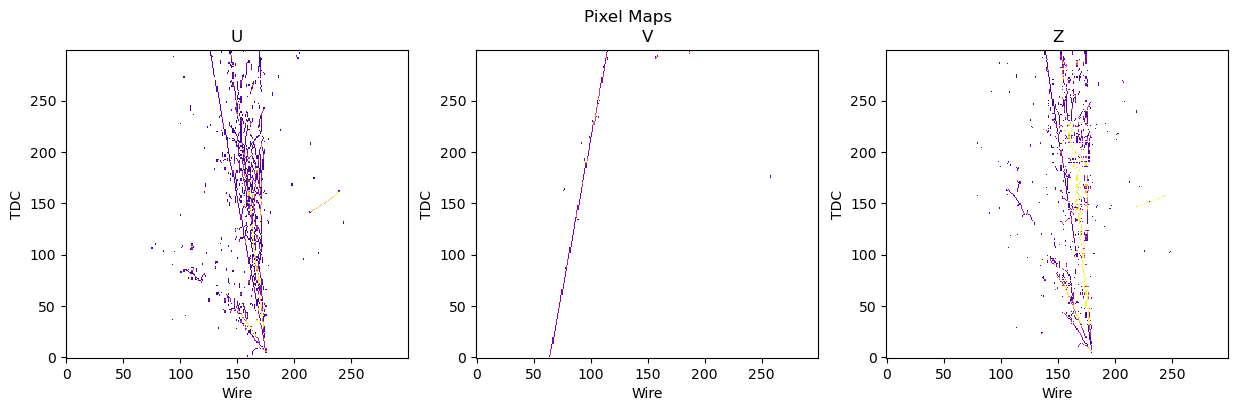

In [8]:
plot_image(maps[1])

In [2]:
path_to_saved_model = "../saved_model/my_model"
layer = tf.keras.layers.TFSMLayer(path_to_saved_model, call_endpoint='serving_default')
input_layer = tf.keras.Input(shape = (300,300, 3)) # e.g. (224, 224, 3)
outputs = layer(input_layer)
model = tf.keras.Model(input_layer, outputs)
model.summary()

I0000 00:00:1740158207.248316  170503 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740158207.268098  170503 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740158207.268202  170503 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740158207.269628  170503 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tfsm_layer (TFSMLayer)          │ (None, 3)              │     4,982,531 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,982,531 (19.01 MB)

 Trainable params: 4,978,499 (18.99 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [9]:
model.predict(np.reshape(maps[1],(1, 300, 300,3)))

I0000 00:00:1740158227.383795  224439 service.cc:146] XLA service 0x7d02ac005bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740158227.383818  224439 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-02-21 11:17:07.394880: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-21 11:17:07.445392: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


I0000 00:00:1740158227.933481  224439 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


{'output_0': array([[0.23898621, 0.58976406, 0.17124976]], dtype=float32)}

In [33]:
maps[1][0].shape

(300, 300)